In [12]:
%pylab inline
import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [185]:
data = pd.read_csv('C:/Users/srija/Desktop/googleplaystore.csv')
data.shape

(10841, 13)



Rating: Remove NaN
Reviews: Convert 3.0M to 300000
Size: Convert eveything to byte
Installs: Remove + sign
Price: Remove $ sign and remove 'Everyone'
Last Updated: To date

In [61]:
#data.dropna(inplace=True)

In [63]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Since there are more than 1474 rows in which some data is missing, so it will not be wise to drop more than 1474 rows.
The better idea is to replace the data with mean or median.

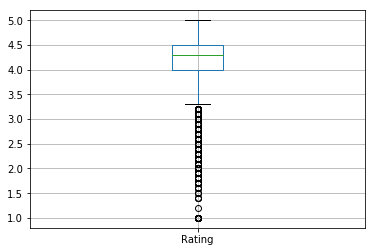

In [53]:
data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A07D57D4A8>]],
      dtype=object)

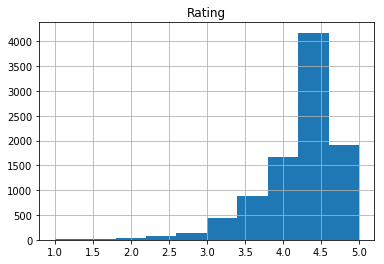

In [54]:
data.hist()

For right/left squeed data we prefer median insted of mean.
Categorical Values: Mode
Numerical Values: Median (right squeed)

In [187]:
def fill_median(inp):
    return inp.fillna(inp.median())

data.Rating = data['Rating'].transform(fill_median)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

There could be more than 2 modes (bi-modal)

Hence we will use the first value of mode mode().values[0]

In [188]:
data['Type'].fillna(str(data['Type'].mode().values[0]), inplace=True)
data['Content Rating'].fillna(str(data['Content Rating'].mode().values[0]), inplace=True)
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace=True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Price:
Remove $
Remove Everyone
convert to Float

In [189]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
data['Price'] = data['Price'].replace('Everyone', np.nan).dropna()
data['Price'] = data['Price'].apply(lambda x: float(x))

In [190]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors= 'coerce')

In [205]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
data['Installs'] = data['Installs'].replace('Free', np.nan).dropna()
data['Installs'] = data['Installs'].apply(lambda x: float(x))

In [214]:
group = data.groupby('Category')
group_rating = group['Rating'].agg(np.mean)
group_price = group['Price'].agg(np.mean)
group_reviews = group['Reviews'].agg(np.mean)


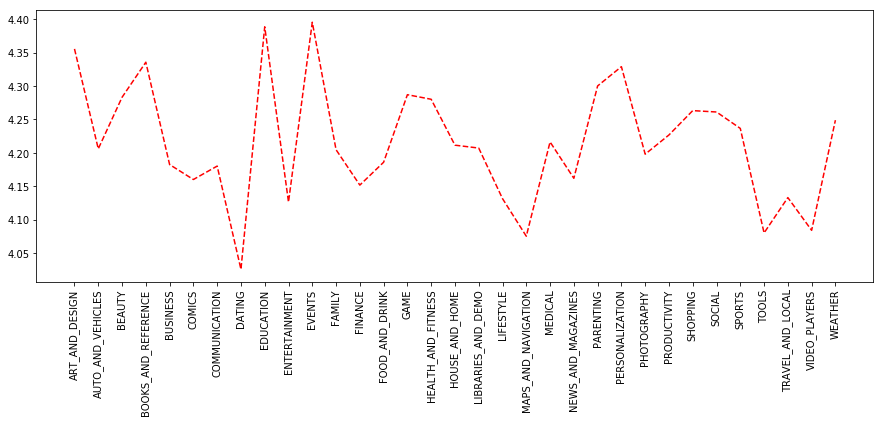

In [213]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plot(group_rating, 'r--')

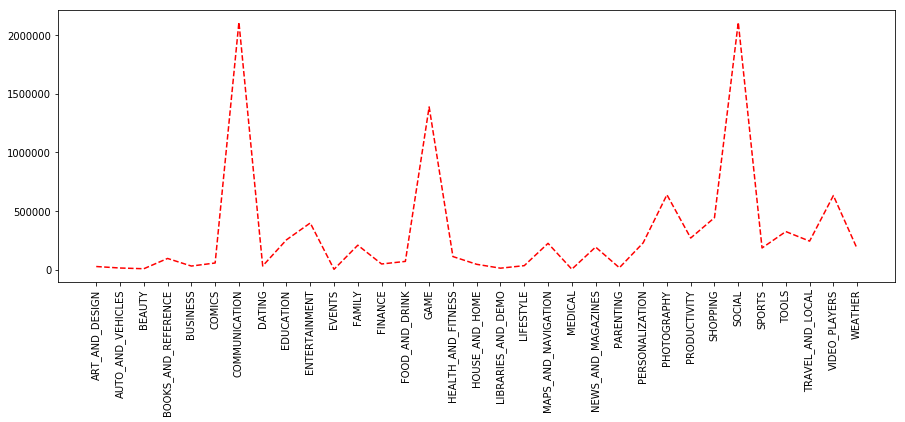

In [215]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plot(group_reviews, 'r--')

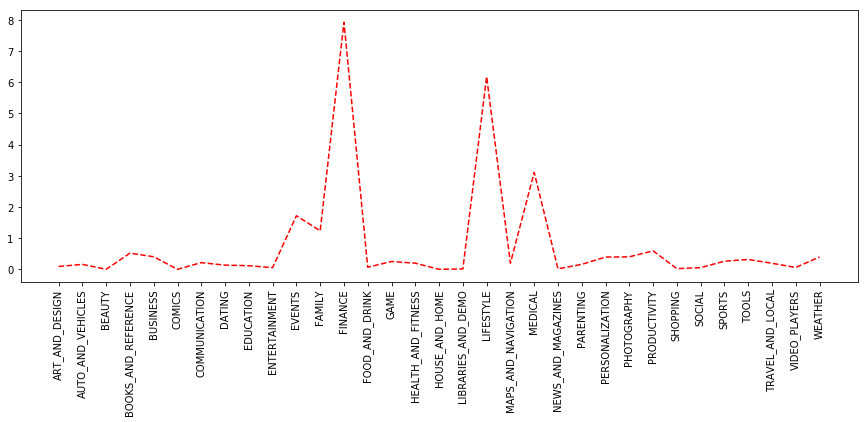

In [212]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plot(group_price, 'r--')